In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("smp2020dataset/train/usual_train.csv").astype(str)

In [3]:
data.drop('数据编号',axis=1, inplace=True)

In [4]:
data

,文本,情绪标签
0,气死姐姐了，快二是阵亡了吗，尼玛，一个半小时过去了也没上车,angry
1,妞妞啊，今天又承办了一个发文登记文号是126~嘻~么么哒~晚安哟,happy
2,这里还值得注意另一个事实，就是张鞠存原有一个东溪草堂为其读书处。,neutral
3,这在前华约国家(尤其是东德)使用R-73的首次联合演习期间，被一些北约组织的飞行员所证实。,neutral
4,TinyThief上wii了?！,surprise
...,...,...
27763,生日礼物你也已经收到了，那么就在说一句：生日快乐,happy
27764,自我、霸道、任性、不服从才是真正的我，百顺百从、没有想法那个她不是我，我只是一直在忍着，只想...,sad
27765,心情本来就不好，某只猪还不同意我年休，还说我一还好今天晚上不用参加考试,angry
27766,#昆明治安#为何如此糟糕？@姚志宏DD？半年，我们10个同事中，2家遭到入室盗窃，住在财经大...,angry


In [7]:
data['情绪标签'].unique()

array(['angry', 'happy', 'neutral', 'surprise', 'sad', 'fear'],
      dtype=object)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/s9/b33d8sfd6c3626p96qkb_s240000gn/T/jieba.cache
Loading model cost 0.265 seconds.
Prefix dict has been built successfully.


输出词频前十的词：
 [('龟速', 57960), ('龟肉', 57959), ('龟策', 57958), ('龟毛', 57957), ('龟头', 57956), ('龟兹', 57955), ('龟儿子', 57954), ('龚自珍', 57953), ('龙骨', 57952), ('龙骑', 57951)]


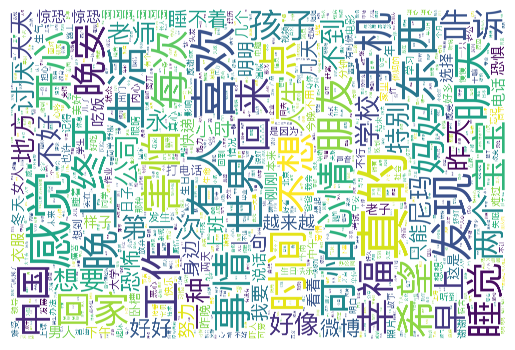

In [5]:
from functions import *

word,tfidf_matrix = clean_and_plot(data['文本'], 'showonly', False)

In [6]:
tfidf_matrix.shape

(27768, 57961)

In [ ]:
import tensorflow as tf
from keras.layers import LSTM, Dense, Input
from keras.models import Model
def mylstm(x):
    inputs = Input(shape=(x))
    encoded = tf.reshape(inputs,[-1,1,57961])
    encoded = LSTM(2048, activation = 'tanh',return_sequences=True)(encoded)
    encoded = LSTM(1024, activation = 'tanh',return_sequences=True)(encoded)
    encoded = LSTM(512, activation = 'tanh',return_sequences=True)(encoded)
    encoded = LSTM(256, activation = 'tanh',return_sequences=True)(encoded)
    encoded = LSTM(128, activation = 'tanh',return_sequences=True)(encoded)
    encoded = LSTM(64, activation = 'tanh',return_sequences=True)(encoded)
    encoded_output = LSTM(10, activation = 'tanh')(encoded)
    encoded_output = Dense(1,activation="sigmoid")(encoded_output)
    model = Model(inputs=[inputs], outputs=encoded_output)
    return model

checkpoint_save_root
checkpoint_save_path = checkpoint_save_root+'IRLG5_'+str(param[0])+'_'+str(param[1])+'_'+str(param[2])+'_.h5'

In [ ]:
from sklearn import preprocessing

enc=preprocessing.LabelEncoder()
enc=enc.fit(['angry', 'happy', 'neutral', 'surprise', 'sad', 'fear'])
data = enc.transform(data)